<a href="https://colab.research.google.com/github/angiepaloes/Sistemas-avanzados-de-produccion-con-python-9cn/blob/main/Taller_1_Datos_Con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clase 1 (2h): Introducción a Jupyter/Colab y al entorno de análisis de datos en Python

**Objetivos de la sesión**
- Configurar y usar Google Colab como entorno de trabajo.
- Comprender la estructura de un notebook (celdas de código y Markdown) y buenas prácticas.
- Importar y verificar librerías clave para análisis de datos: `numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`.
- Cargar un `.csv` y realizar una exploración inicial.
- Practicar *slicing* (filas/columnas) y conteo de valores faltantes.



## Flujo de trabajo recomendado (Colab ⇄ GitHub)
1. Abre este notebook en **Google Colab**.
2. Guarda una copia en tu repositorio: `Archivo → Guardar una copia en GitHub`.
3. Versiona tu trabajo repitiendo el guardado al final de la clase.



## Notebooks: estructura y ejecución
- Celdas **Código** y **Markdown**.
- Ejecuta con `Shift + Enter`.
- Modos: **Editar** (borde verde) y **Comando** (borde azul).  
  Atajos: `A` (arriba), `B` (abajo), `M` (Markdown), `Y` (Código), `D D` (borrar).


In [ ]:

print('Hola, Notebook 👋') # imprimir numero de datos. informes

1 + 2

Hola, Notebook 👋


3

In [ ]:
print(1 + 2)
1 + 3

3


4

In [ ]:
1 + 2
1 + 3;  # suprime la última salida


## Buenas prácticas
- Indentación 4 espacios · Comentarios que expliquen el “por qué” · Longitud ≤ 100 · Bloques lógicos.


In [ ]:

resultado = [] #creación de listo vacia
for x in range(10): # un solo ciclo (realice el recorrido dado en el rango() de x)
    for y in range(5): #Ciclos, doble ciclo interno
        if x * y > 10: #condicional de si >10 todas lasa parejas deben ser mayor a 10
                  resultado.append((x, y))
print(resultado)


[(3, 4), (4, 3), (4, 4), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4), (7, 2), (7, 3), (7, 4), (8, 2), (8, 3), (8, 4), (9, 2), (9, 3), (9, 4)]



## Librerías clave
`numpy` # operaciones entre matrices y matematicas, `pandas`#libreria de graficas, `matplotlib`# Libreria para desplegar datos, `seaborn`#, `statsmodels` # libreria para estadistica


In [ ]:

# !pip install numpy pandas matplotlib seaborn statsmodels --quiet  # Descomenta si hace falta
import sys, platform
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
print("Python:", sys.version.split()[0], "|", platform.platform())
print("NumPy:", np.__version__, "| pandas:", pd.__version__, "| matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__, "| statsmodels:", sm.__version__)


Python: 3.11.13 | Linux-6.1.123+-x86_64-with-glibc2.35
NumPy: 2.0.2 | pandas: 2.2.2 | matplotlib: 3.10.0
seaborn: 0.13.2 | statsmodels: 0.14.5


## Cargar datos (elige una opción)

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Opción A) Subir CSV desde tu equipo
from io import BytesIO
import pandas as pd
try:
    from google.colab import files
    uploaded = files.upload()
    if len(uploaded):
        fname, fbytes = next(iter(uploaded.items()))
        da = pd.read_csv(BytesIO(fbytes))
        print("Archivo cargado:", fname, "| shape:", da.shape)
        display(da.head())
except Exception as e:
    print("Si no estás en Colab o prefieres otra opción, usa la Opción B/C/D. Detalle:", e)

KeyboardInterrupt: 

In [ ]:


# URL directa al archivo .csv de calidad de vino tinto
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Leer el archivo CSV especificando el separador de punto y coma
df = pd.read_csv(url, sep=';')

# Mostrar las primeras 5 filas para verificar que se cargó correctamente
print("Datos cargados exitosamente:")
df.head()


Datos cargados exitosamente:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/18_AZN4y_LcReFx_4Q9ktkHlQf-jFp_gzrgezaBdAzo8/edit#gid=0


In [ ]:

# Opción C) Leer desde Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# da = pd.read_csv('/content/drive/MiCarpeta/datos.csv')
# da.head()


### Opción D) Dataset de ejemplo

In [ ]:

import numpy as np, pandas as pd
np.random.seed(42)
n = 250
da = pd.DataFrame({
    "SEQN": np.arange(1, n+1),
    "RIAGENDR": np.random.choice([1, 2], size=n),
    "RIDAGEYR": np.random.randint(18, 80, size=n),
    "BMXWT": np.round(np.random.normal(70, 12, size=n), 1),
    "BMXHT": np.round(np.random.normal(168, 10, size=n), 1),
})
da["BMXBMI"] = np.round(da["BMXWT"] / (da["BMXHT"]/100)**2, 1)
da.loc[np.random.choice(da.index, size=10, replace=False), "BMXWT"] = np.nan
da.head()


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


## Exploración inicial

In [ ]:

print("shape:", da.shape)
print("columnas:", list(da.columns))
display(da.dtypes)
display(da.head())
display(da.describe(include='all'))


shape: (250, 6)
columnas: ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI']


,0
SEQN,int64
RIAGENDR,int64
RIDAGEYR,int64
BMXWT,float64
BMXHT,float64
BMXBMI,float64


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,250.000000,250.000000,250.000000,240.000000,250.000000,250.000000
mean,125.500000,1.496000,50.088000,69.407083,168.411600,24.830400
std,72.312977,0.500987,18.063038,13.028989,10.664936,5.719827
min,1.000000,1.000000,18.000000,29.600000,140.200000,10.200000
25%,63.250000,1.000000,36.000000,60.775000,160.800000,21.100000
50%,125.500000,1.000000,50.000000,69.100000,168.700000,24.200000
75%,187.750000,2.000000,66.000000,79.550000,175.100000,28.175000
max,250.000000,2.000000,79.000000,108.200000,197.800000,49.500000


## *Slicing* (filas y columnas)

In [ ]:

w = da["RIDAGEYR"]; x = da.loc[:, "RIDAGEYR"]; y = da.RIDAGEYR
z = da.iloc[:, da.columns.get_loc("RIDAGEYR")]
print("Max RIDAGEYR (cuatro formas):", w.max(), x.max(), y.max(), z.max())
fila4 = da.iloc[3, :]; fila4


Max RIDAGEYR (cuatro formas): 79 79 79 79


,3
SEQN,4.0
RIAGENDR,1.0
RIDAGEYR,30.0
BMXWT,57.7
BMXHT,173.6
BMXBMI,19.1


## Faltantes

In [ ]:

faltantes_bmxwt = pd.isnull(da["BMXWT"]).sum()
no_faltantes_bmxwt = pd.notnull(da["BMXWT"]).sum()
print("BMXWT → faltantes:", faltantes_bmxwt, "| no faltantes:", no_faltantes_bmxwt)


BMXWT → faltantes: 10 | no faltantes: 240


## Visualización rápida

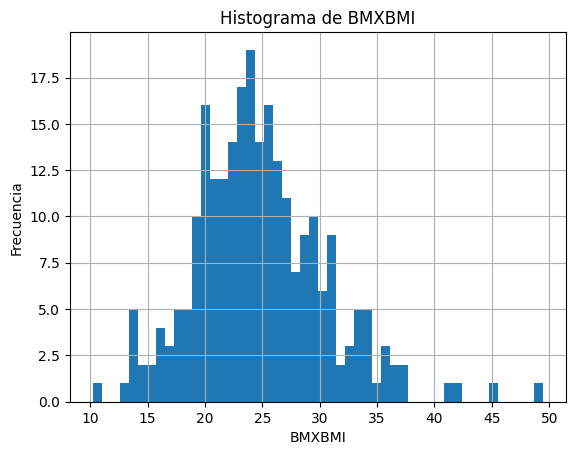

In [ ]:

col = "BMXBMI" if "BMXBMI" in da.columns else da.select_dtypes(include='number').columns[0]
plt.figure(); da[col].hist(bins=50)
plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia"); plt.show()



## Ejercicios (para tu Collab)
1) Reporta `shape`, `columns`, `dtypes`, `head`, `describe`.  
2) Dos variables numéricas: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).  
3) Tabla de frecuencias para una variable categórica.  
4) Columnas con valores faltantes y conteo por variable.  
5) (Opcional) Nueva columna derivada y su distribución.



### Respuestas del estudiante (Markdown)
<div class="response-box">
Escribe aquí tu análisis y conclusiones para los puntos 1–5.
</div>


In [ ]:
# Usar la base de datos https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Respuestas del estudiante (Código)
# TODO: Añade aquí tu código para los ejercicios de la Clase 1


In [ ]:
# URL directa al archivo .csv de calidad de vino tinto
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Leer el archivo CSV especificando el separador de punto y coma
df = pd.read_csv(url, sep=';')

# Mostrar las primeras 5 filas para verificar que se cargó correctamente
print("Datos cargados exitosamente:")
df.head()


Datos cargados exitosamente:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print("shape:", da.shape)
print("columnas:", list(da.columns))
display(da.dtypes)
display(da.head())
display(da.describe(include='all'))


shape: (250, 6)
columnas: ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI']


,0
SEQN,int64
RIAGENDR,int64
RIDAGEYR,int64
BMXWT,float64
BMXHT,float64
BMXBMI,float64


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,250.000000,250.000000,250.000000,240.000000,250.000000,250.000000
mean,125.500000,1.496000,50.088000,69.407083,168.411600,24.830400
std,72.312977,0.500987,18.063038,13.028989,10.664936,5.719827
min,1.000000,1.000000,18.000000,29.600000,140.200000,10.200000
25%,63.250000,1.000000,36.000000,60.775000,160.800000,21.100000
50%,125.500000,1.000000,50.000000,69.100000,168.700000,24.200000
75%,187.750000,2.000000,66.000000,79.550000,175.100000,28.175000
max,250.000000,2.000000,79.000000,108.200000,197.800000,49.500000


In [ ]:
w = da["RIDAGEYR"]; x = da.loc[:, "RIDAGEYR"]; y = da.RIDAGEYR
z = da.iloc[:, da.columns.get_loc("RIDAGEYR")]
print("Max RIDAGEYR (cuatro formas):", w.max(), x.max(), y.max(), z.max())
fila4 = da.iloc[3, :]; fila4

Max RIDAGEYR (cuatro formas): 79 79 79 79


,3
SEQN,4.0
RIAGENDR,1.0
RIDAGEYR,30.0
BMXWT,57.7
BMXHT,173.6
BMXBMI,19.1


In [ ]:
faltantes_bmxwt = pd.isnull(da["BMXWT"]).sum()
no_faltantes_bmxwt = pd.notnull(da["BMXWT"]).sum()
print("BMXWT → faltantes:", faltantes_bmxwt, "| no faltantes:", no_faltantes_bmxwt)

BMXWT → faltantes: 10 | no faltantes: 240


In [ ]:
# Choose two numeric variables for analysis.
# For example, 'alcohol' and 'fixed acidity'
variable1 = 'alcohol'
variable2 = 'fixed acidity'

# Calculate descriptive statistics for the chosen variables
print(f"Descriptive statistics for '{variable1}':")
print("Mean:", df[variable1].mean())
print("Median:", df[variable1].median())
print("Standard Deviation:", df[variable1].std())
print("Quantiles (25%, 50%, 75%):\n", df[variable1].quantile([0.25, 0.5, 0.75]))

print(f"\nDescriptive statistics for '{variable2}':")
print("Mean:", df[variable2].mean())
print("Median:", df[variable2].median())
print("Standard Deviation:", df[variable2].std())
print("Quantiles (25%, 50%, 75%):\n", df[variable2].quantile([0.25, 0.5, 0.75]))

Descriptive statistics for 'alcohol':
Mean: 10.422983114446529
Median: 10.2
Standard Deviation: 1.0656675818473926
Quantiles (25%, 50%, 75%):
 0.25     9.5
0.50    10.2
0.75    11.1
Name: alcohol, dtype: float64

Descriptive statistics for 'fixed acidity':
Mean: 8.31963727329581
Median: 7.9
Standard Deviation: 1.7410963181277006
Quantiles (25%, 50%, 75%):
 0.25    7.1
0.50    7.9
0.75    9.2
Name: fixed acidity, dtype: float64


In [ ]:
# Choose a categorical variable.
# For example, 'quality'
categorical_variable = 'quality'

# Generate the frequency table
if categorical_variable in df.columns:
    frequency_table = df[categorical_variable].value_counts().sort_index()
    print(f"Frequency table for '{categorical_variable}':")
    print(frequency_table)
else:
    print(f"Column '{categorical_variable}' not found in the DataFrame.")

Frequency table for 'quality':
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


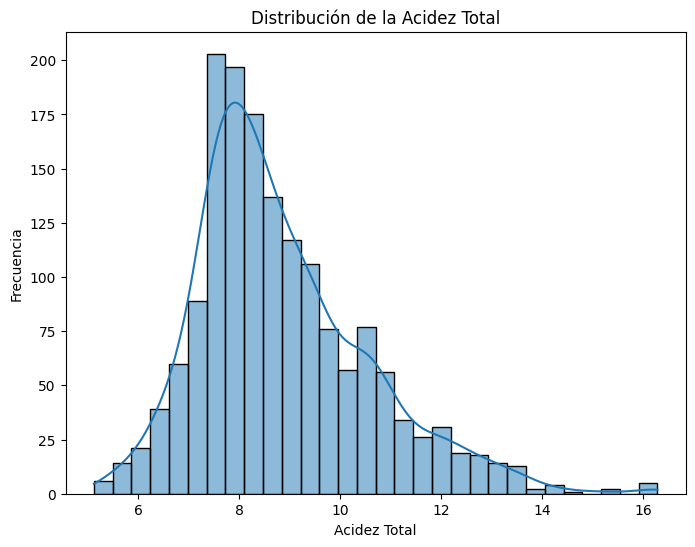

In [ ]:
# Create a new derived column (e.g., total acidity)
df['total_acid'] = df['fixed acidity'] + df['volatile acidity']

# Visualize the distribution of the new column
plt.figure(figsize=(8, 6))
sns.histplot(df['total_acid'], bins=30, kde=True)
plt.title('Distribución de la Acidez Total')
plt.xlabel('Acidez Total')
plt.ylabel('Frecuencia')
plt.show()

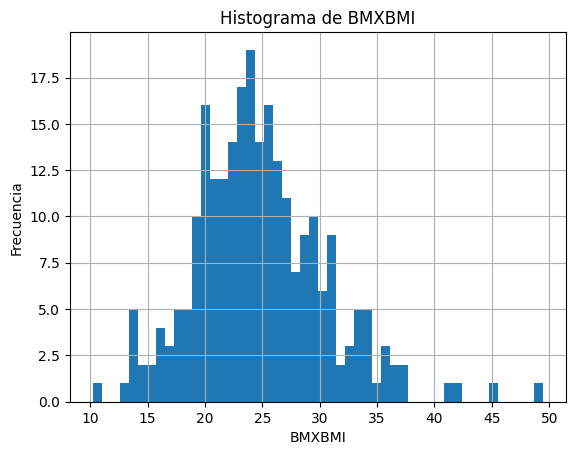

In [ ]:
col = "BMXBMI" if "BMXBMI" in da.columns else da.select_dtypes(include='number').columns[0]
plt.figure(); da[col].hist(bins=50)
plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia"); plt.show()
